# Projeto 1 - Ciência dos Dados

Nome: Lucas Hix

## Pergunta a ser respondida

A entrada de um país em um bloco econômico que possui redução de tarifas em protudos agrículas, assim como em maquinário para produção, terá um efeito de aumentar a produção agrícula do pais por $km^2$ de área agrículas acima da média mundial?

Ultilizando como exemplo os paises membros das organizações intergovernamentais do mercosul e da união europeia

## Explicação da hipótese e mecanismo

A redução de tarifas na exportação de protudos agrículas e importação de maquinário para a produção dentro de um bloco econômico acaba permetindo que este país tenha um aumento de produção agricula em sua área agrícula maior que a do mundo uma vez que estas tarifas são muito mais vantajosas para este país do que acordos bilaterias com outros países permentido portando a aquisição de tecnologia para a produção além de um aumento na sua exportação.

[Artigo científico de base](https://www.questia.com/library/journal/1G1-65379114/potential-gains-from-reducing-trade-barriers-in-manufacturing)

## Bases de dados usadas

[World Agricultural land (sq. km)](https://data.worldbank.org/indicator/AG.LND.AGRI.K2) <p>
[World Cereal production (metric tons)](https://data.worldbank.org/indicator/AG.PRD.CREL.MT)

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tabelas Originais

lista_remover = ["ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS", "EMU", "EUU", "FCS", "HIC", "HPC", "IBD",
                 "IBT", "IDA", "IDB", "IDX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA",
                 "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SAS", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN",
                 "TSA", "TSS", "UMC", "WLD", "INX"]

# Tabela da Área Rural

tabela_area_rural = pd.read_excel("Area Rural.xls", sheet_name="Data", skiprows=3)

i = 0

for tag in tabela_area_rural["Country Code"]:
    if tag in lista_remover:
        tabela_area_rural = tabela_area_rural.drop(index=i)
    i = i + 1
    
tabela_area_rural = tabela_area_rural.fillna(1);

# Tabela de Produção Agricula

tabela_producao_agricula = pd.read_excel("Producao Agricula.xls", sheet_name="Data", skiprows=3)

i = 0

for tag in tabela_producao_agricula["Country Code"]:
    if tag in lista_remover:
        tabela_producao_agricula = tabela_producao_agricula.drop(index=i)
    i = i + 1

tabela_producao_agricula = tabela_producao_agricula.fillna(0);

In [3]:
# Criando a Tabela que vai ser usada

data = pd.DataFrame(index=tabela_producao_agricula.index)

data["Country Name"] = tabela_producao_agricula["Country Name"]

for x in range(1961, 2017):
    data[x] = tabela_producao_agricula[str(x)]/tabela_area_rural[str(x)]

data = data.set_index("Country Name")
del data.index.name

data.head(3)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Afghanistan,9.801061,9.788136,8.934144,9.853986,9.993399,9.202648,10.073988,10.310690,10.627434,9.240646,...,15.262464,10.419414,17.182801,15.713118,12.347718,16.826695,17.199496,17.800382,15.325273,14.600111
Angola,0.951548,0.949301,0.900035,0.985153,0.981317,0.876091,0.898308,0.917273,1.129077,1.003336,...,1.353723,1.308218,1.813079,2.024223,2.395026,0.863782,2.829191,3.080649,3.412926,4.095849


In [4]:
# Funções

def getMedia(tabela):
    lista_de_apoio = []
    
    for column in tabela.columns:
        count = 0
        total = 0
        
        for dado in tabela[column]:
            if dado > 0:
                total = total + dado
                count = count + 1
        
        lista_de_apoio.append(total/count)
    
    return pd.Series(index=tabela.columns, data=lista_de_apoio)

def mkPlot(lista, cores):
    i = 0
    for series in lista:
        plt.plot(series.index, series, color=cores[i])
        plt.xlabel("Ano")
        plt.ylabel("Produção (ton/km^2)")
        i = i + 1
    plt.grid(True)
    plt.show()

def reta(dados, cor):
    a = dados.cov(dados.index) / dados.index.var()
    b = dados.mean() - a*dados.index.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados.index, dados, c=cor, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados.index.min(), dados.index.max()), (a*dados.index.min()+b, a*dados.index.max()+b), color=cor)

    plt.tight_layout()

In [5]:
# Crecimento Mundial

media_mundial = getMedia(data)

reta(media_mundial, "b")
mkPlot([media_mundial], ["b"])

TypeError: unsupported type: <class 'pandas.core.indexes.base.Index'>

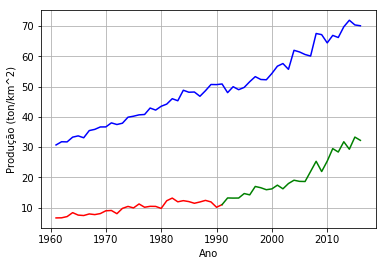

In [6]:
# Mercosul fundado em 1 de janeiro de 1991

pre_mercosul = data.loc[("Argentina", "Brazil", "Paraguay", "Uruguay"), 1991>=data.columns]
mercosul = data.loc[("Argentina", "Brazil", "Paraguay", "Uruguay"), 1991<=data.columns]

media_pre_mercosul = getMedia(pre_mercosul)
media_mercosul = getMedia(mercosul)

mkPlot([media_mundial, media_pre_mercosul, media_mercosul], ["b", "r", "g"])

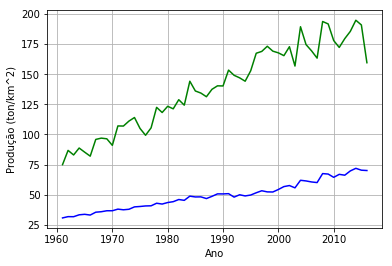

In [7]:
# Paises fundadores da União Europeia (1 de janeiro de 1958)

eu_list_1 = ["Belgium", "France", "Germany", "Italy", "Luxembourg", "Netherlands"]

eu_1 = data.loc[eu_list_1, :]

media_eu_1 = getMedia(eu_1)

mkPlot([media_mundial, media_eu_1], ["b", "g"])

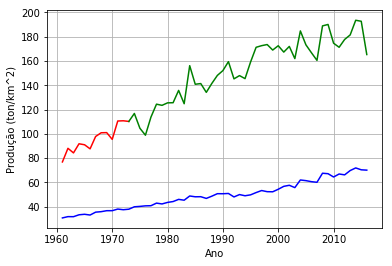

In [8]:
# União Europeia entrda de paises em 1 de janeiro de 1973

eu_list_2 = []
eu_list_2.extend(eu_list_1)
eu_list_2.extend(("Denmark", "Ireland", "United Kingdom"))

pre_eu_2 = data.loc[eu_list_2, 1973>=data.columns]
eu_2 = data.loc[eu_list_2, 1973<=data.columns]

media_pre_eu_2 = getMedia(pre_eu_2)
media_eu_2 = getMedia(eu_2)

mkPlot([media_mundial, media_pre_eu_2, media_eu_2], ["b", "r", "g"])

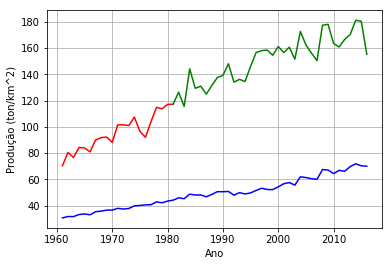

In [10]:
# União Europeia entrda da Grécia (1 de janeiro de 1981)

eu_list_3 = []
eu_list_3.extend(eu_list_2)
eu_list_3.append("Greece")

pre_eu_3 = data.loc[eu_list_3, 1981>=data.columns]
eu_3 = data.loc[eu_list_3, 1981<=data.columns]

media_pre_eu_3 = getMedia(pre_eu_3)
media_eu_3 = getMedia(eu_3)

mkPlot([media_mundial, media_pre_eu_3, media_eu_3], ["b", "r", "g"])

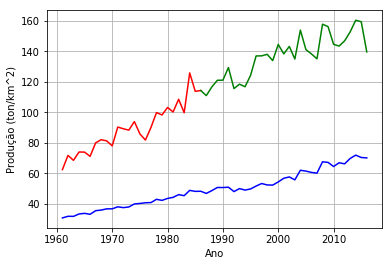

In [11]:
# União Europeia entrda de paises em 1 de janeiro de 1986

eu_list_4 = []
eu_list_4.extend(eu_list_3)
eu_list_4.extend(("Portugal", "Spain"))

pre_eu_4 = data.loc[eu_list_4, 1986>=data.columns]
eu_4 = data.loc[eu_list_4, 1986<=data.columns]

media_pre_eu_4 = getMedia(pre_eu_4)
media_eu_4 = getMedia(eu_4)

mkPlot([media_mundial, media_pre_eu_4, media_eu_4], ["b", "r", "g"])

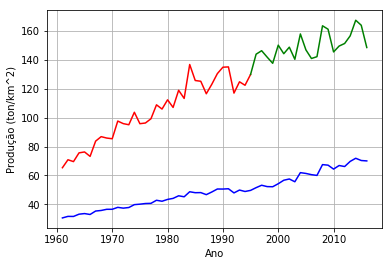

In [13]:
# União Europeia entrda de paises em 1 de janeiro de 1995

eu_list_5 = []
eu_list_5.extend(eu_list_4)
eu_list_5.extend(("Austria", "Finland", "Sweden"))

pre_eu_5 = data.loc[eu_list_5, 1995>=data.columns]
eu_5 = data.loc[eu_list_5, 1995<=data.columns]

media_pre_eu_5 = getMedia(pre_eu_5)
media_eu_5 = getMedia(eu_5)

mkPlot([media_mundial, media_pre_eu_5, media_eu_5], ["b", "r", "g"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


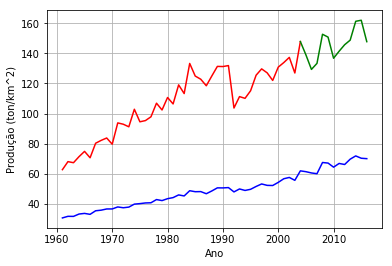

In [14]:
# União Europeia entrda de paises em 1 de maio de 2004

eu_list_6 = []
eu_list_6.extend(eu_list_5)
eu_list_6.extend(("Czechia", "Cyprus", "Estonia", "Hungary", "Latvia", "Lithuania", "Malta", "Poland",
                  "Slovakia", "Slovenia"))

pre_eu_6 = data.loc[eu_list_6, 2004>=data.columns]
eu_6 = data.loc[eu_list_6, 2004<=data.columns]

media_pre_eu_6 = getMedia(pre_eu_6)
media_eu_6 = getMedia(eu_6)

mkPlot([media_mundial, media_pre_eu_6, media_eu_6], ["b", "r", "g"])

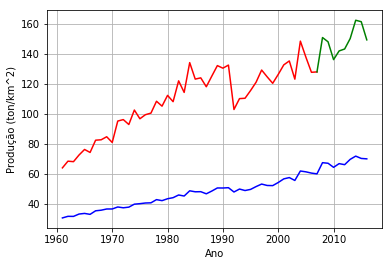

In [15]:
# União Europeia entrda de paises em 1 de janeiro de 2007

eu_list_7 = []
eu_list_7.extend(eu_list_6)
eu_list_7.extend(("Bulgaria", "Romania"))

pre_eu_7 = data.loc[eu_list_7, 2007>=data.columns]
eu_7 = data.loc[eu_list_7, 2007<=data.columns]

media_pre_eu_7 = getMedia(pre_eu_7)
media_eu_7 = getMedia(eu_7)

mkPlot([media_mundial, media_pre_eu_7, media_eu_7], ["b", "r", "g"])

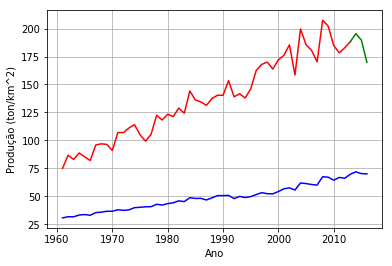

In [17]:
# União Europeia entrda da Croácia (1 de julho de 2013)

eu_list_8 = []
eu_list_8.extend(eu_list_1)
eu_list_8.append("Croatia")

pre_eu_8 = data.loc[eu_list_8, 2013>=data.columns]
eu_8 = data.loc[eu_list_8, 2013<=data.columns]

media_pre_eu_8 = getMedia(pre_eu_8)
media_eu_8 = getMedia(eu_8)

mkPlot([media_mundial, media_pre_eu_8, media_eu_8], ["b", "r", "g"])

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados